# Algoritmo K-Nearest Neighbor (KNN)

## Introducción

El K-Nearest Neighbor (KNN) es uno de los algoritmos de clasificación más simples y efectivos. Es un modelo basado en instancias, lo que significa que no realiza ningún aprendizaje explícito durante la fase de entrenamiento, sino que almacena los ejemplos de entrenamiento y clasifica los nuevos ejemplos basándose en la proximidad a los ejemplos almacenados.

### ¿Cómo funciona?

KNN clasifica un nuevo punto de datos observando los `k` puntos de datos más cercanos en el conjunto de entrenamiento y asignándole la clase más común (mayoritaria) entre ellos. Este algoritmo es intuitivo porque se basa en la idea de "si se parece a lo que ya conozco, debería ser lo mismo".

Por ejemplo, si quisiéramos clasificar un tipo de flor, KNN buscaría las `k` flores más parecidas en nuestro conjunto de datos y vería a qué tipo de flor pertenecen esas `k` flores cercanas para asignarle la misma categoría.

KNN es muy útil cuando los datos tienen relaciones complejas que no son lineales, y es fácil de entender y de implementar.


## Explicación Matemática

El algoritmo KNN se basa en la distancia entre puntos de datos. Una de las distancias más comunes es la **distancia Euclidiana**.

### Distancia Euclidiana

La distancia Euclidiana entre dos puntos en un espacio `n`-dimensional es la longitud de la línea recta que los une, y se calcula de la siguiente forma:

$$
d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$$

Donde:
- \( p \) y \( q \) son los puntos en el espacio.
- \( p_i \) y \( q_i \) son las coordenadas de los puntos en la dimensión `i`.

### Clasificación con KNN

Para clasificar un nuevo punto:
1. Calcula la distancia entre el nuevo punto y todos los puntos en el conjunto de datos de entrenamiento.
2. Selecciona los `k` puntos más cercanos (es decir, aquellos con las distancias más pequeñas).
3. La clase más común entre estos `k` vecinos es la clase asignada al nuevo punto.

El valor de `k` es un hiperparámetro que se debe elegir cuidadosamente. Un `k` pequeño puede hacer que el modelo sea sensible al ruido, mientras que un `k` grande puede hacer que el modelo pierda detalles importantes.


## Ejemplo Práctico: Clasificación de Tipos de Frutas

Imaginemos que tenemos un conjunto de datos de frutas, donde cada fruta está descrita por su peso y su tamaño. Queremos clasificar una nueva fruta basándonos en estas características.

### Paso 1: Creación del Conjunto de Datos


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el conjunto de datos original
data = {
    'Peso': [150, 170, 140, 130, 155, 180, 200, 120, 135, 145],
    'Tamaño': [7.0, 7.5, 6.5, 6.0, 7.2, 8.0, 8.5, 5.5, 6.2, 6.8],
    'Tipo': ['Manzana', 'Manzana', 'Manzana', 'Manzana', 'Manzana', 'Naranja', 'Naranja', 'Naranja', 'Naranja', 'Naranja']
}

# Crear un DataFrame con los datos originales
df = pd.DataFrame(data)

# Duplicar el conjunto de datos para obtener veinte elementos
np.random.seed(42)  # Para reproducibilidad
additional_data = {
    'Peso': np.random.choice(data['Peso'], size=10, replace=True) + np.random.randint(-10, 10, size=10),
    'Tamaño': np.random.choice(data['Tamaño'], size=10, replace=True) + np.random.uniform(-0.5, 0.5, size=10),
    'Tipo': np.random.choice(data['Tipo'], size=10, replace=True)
}

# Crear un DataFrame con los datos adicionales
df_additional = pd.DataFrame(additional_data)

# Combinar ambos DataFrames
df = pd.concat([df, df_additional], ignore_index=True)

# Visualizar el DataFrame combinado
df.head(20)



,Peso,Tamaño,Tipo
0,150,7.000000,Manzana
1,170,7.500000,Manzana
2,140,6.500000,Manzana
3,130,6.000000,Manzana
4,155,7.200000,Manzana
5,180,8.000000,Naranja
6,200,8.500000,Naranja
7,120,5.500000,Naranja
8,135,6.200000,Naranja
9,145,6.800000,Naranja


### Paso 2: Separación de Datos para Entrenamiento y Prueba

Vamos a dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.


In [ ]:
# Separar las características (X) y la etiqueta (y)
X = df[['Peso', 'Tamaño']]
y = df['Tipo']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Paso 3: Entrenamiento del Modelo KNN

Vamos a entrenar un modelo KNN con `k=3`.


In [ ]:
# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

### Paso 4: Predicción y Evaluación

Ahora, usamos el modelo entrenado para predecir los tipos de frutas en el conjunto de prueba.


In [ ]:
# Importar las bibliotecas necesarias
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hacer predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Ajustar zero_division para evitar warnings en el reporte de clasificación
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.3333333333333333

Confusion Matrix:
 [[1 2]
 [2 1]]

Classification Report:
               precision    recall  f1-score   support

     Manzana       0.33      0.33      0.33         3
     Naranja       0.33      0.33      0.33         3

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.33         6
weighted avg       0.33      0.33      0.33         6



## Interpretación de los Resultados

### Gráfico de la Clasificación

Vamos a visualizar los puntos de entrenamiento y los puntos de prueba para ver cómo el modelo clasifica las frutas.


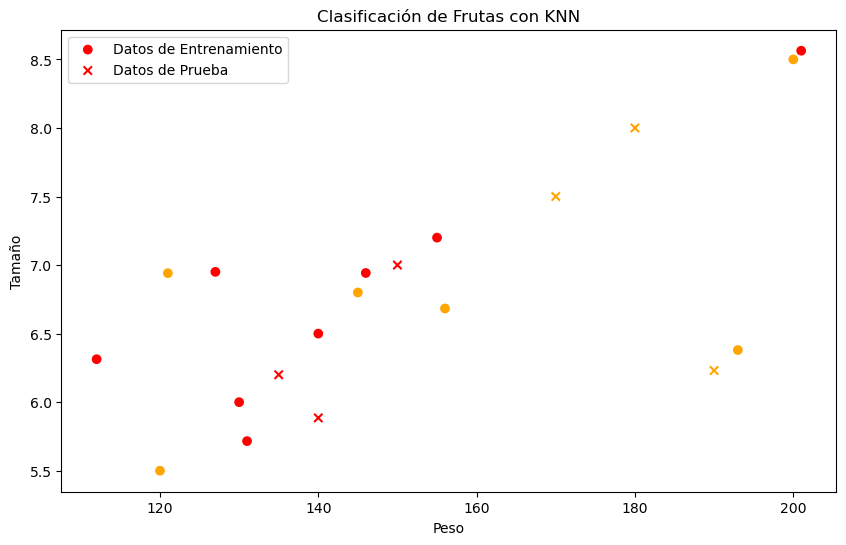

In [ ]:
# Visualización de los datos y la clasificación
plt.figure(figsize=(10, 6))

# Puntos de entrenamiento
plt.scatter(X_train['Peso'], X_train['Tamaño'],
            c=[{'Manzana': 'red', 'Naranja': 'orange'}[x] for x in y_train],
            label='Datos de Entrenamiento')

# Puntos de prueba
plt.scatter(X_test['Peso'], X_test['Tamaño'],
            c=[{'Manzana': 'red', 'Naranja': 'orange'}[x] for x in y_pred],
            marker='x', label='Datos de Prueba')

plt.xlabel('Peso')
plt.ylabel('Tamaño')
plt.title('Clasificación de Frutas con KNN')
plt.legend()
plt.show()


### Explicación de los Resultados

En el gráfico anterior, los puntos circulares representan las frutas del conjunto de entrenamiento, donde las manzanas están en rojo y las naranjas en naranja. Los puntos en forma de "x" representan las frutas del conjunto de prueba, que han sido clasificadas por el modelo.

El modelo KNN ha sido capaz de clasificar correctamente la mayoría de las frutas basándose en su proximidad a los puntos de entrenamiento. La precisión obtenida y la matriz de confusión nos muestran cuán bien funciona el modelo para este conjunto de datos. Un valor de `k=3` significa que el modelo toma en cuenta los 3 vecinos más cercanos para tomar la decisión final de clasificación.
